<a href="https://colab.research.google.com/github/umashankar-027/Customer-Behavior-Analysis-for-an-E-Commerce-Platform-/blob/main/customer_behavioural_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Step 1: Install Required Libraries
!pip install pandas numpy matplotlib seaborn scikit-learn

In [29]:
! git clone https://github.com/umashankar-027/Customer-Behavior-Analysis-for-an-E-Commerce-Platform-.git

Cloning into 'Customer-Behavior-Analysis-for-an-E-Commerce-Platform-'...
remote: Enumerating objects: 9, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 9 (delta 0), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (9/9), 12.08 KiB | 6.04 MiB/s, done.


In [ ]:
# Step 2: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from scipy.stats import ttest_ind

In [ ]:
# Step 3: Load Dataset
from google.colab import files
uploaded = files.upload()

Saving customer_data.csv to customer_data.csv


In [ ]:
# Step 4 = read dataset
df = pd.read_csv('customer_data.csv')

In [ ]:
# Step 5 = print coloumns
print(df.head())

   Customer ID  Age  Gender  Purchase Amount  Frequency of Purchases  \
0            1   56  Female       863.740072                      14   
1            2   69    Male       950.025417                      15   
2            3   46    Male       155.602746                       9   
3            4   32  Female       927.321749                      15   
4            5   60    Male       497.195130                      17   

  Signup Date  
0  2020-01-01  
1  2020-01-02  
2  2020-01-03  
3  2020-01-04  
4  2020-01-05  


In [ ]:
# Step 6 = Check the missing values
print(df.isnull().sum())

Customer ID               0
Age                       0
Gender                    0
Purchase Amount           0
Frequency of Purchases    0
Signup Date               0
dtype: int64


In [ ]:
# Step 7 = Customize the missing values
df = df.dropna()

In [ ]:
# Step 8 = Drop the missing values
df = df.drop_duplicates()

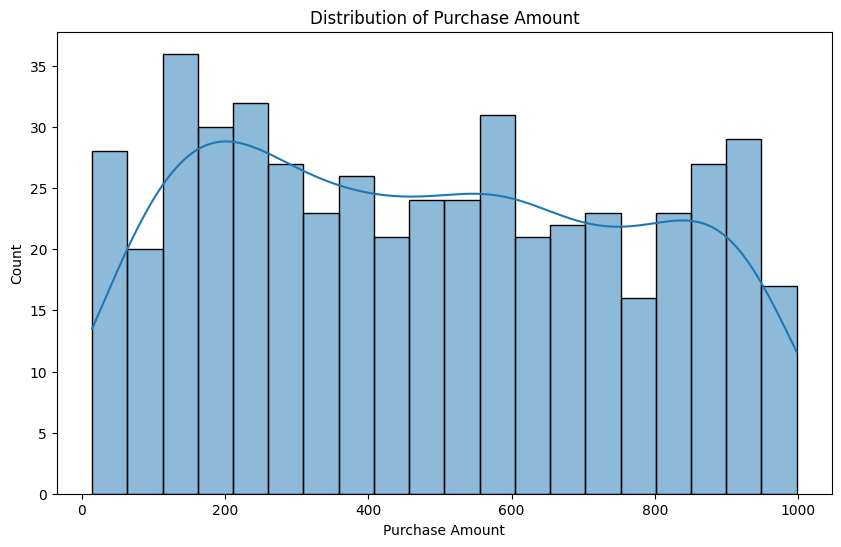

In [ ]:
# Step 9 = Plot the graph of "Distribution of Purchase Amount"
plt.figure(figsize=(10, 6))
sns.histplot(df['Purchase Amount'], bins=20, kde=True)
plt.title('Distribution of Purchase Amount')
plt.show()

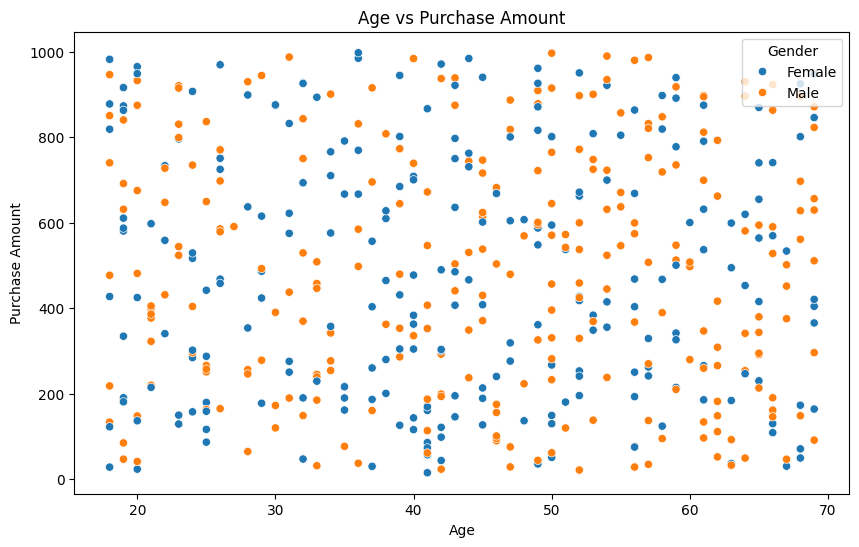

In [ ]:
# Step 10 = Plot the graph of "Age vs Purchase Amount"
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Purchase Amount', data=df, hue='Gender')
plt.title('Age vs Purchase Amount')
plt.show()

In [ ]:
# Step 11 = Print Coloumn names
print(df.dtypes)

Customer ID                 int64
Age                         int64
Gender                     object
Purchase Amount           float64
Frequency of Purchases      int64
Signup Date                object
dtype: object


In [ ]:
# Step 12 = Categorizing the gender values
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})


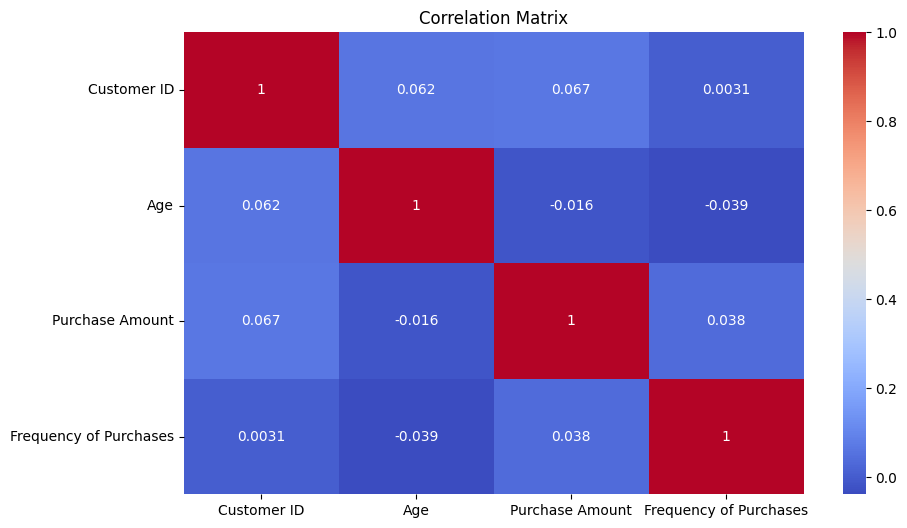

In [ ]:
# Step 13 = Correlation and plot the correlation map
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [ ]:
# Step 14 = male & female seprate purchasing amount
male_purchases = df[df['Gender'] == 'Male']['Purchase Amount']
female_purchases = df[df['Gender'] == 'Female']['Purchase Amount']


In [ ]:
# Step 15 = Performs a independent t-test
t_stat, p_value = ttest_ind(male_purchases, female_purchases)
print(f"T-statistic: {t_stat}, P-value: {p_value}")

T-statistic: nan, P-value: nan


In [ ]:
# Step 16 = selects the columns 'Purchase Amount' and 'Frequency of Purchases'
X = df[['Purchase Amount', 'Frequency of Purchases']]

In [ ]:
# Step 17 = Scaling the process
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Step 18 = Performs the Elbow Method to determine the optimal number of clusters (k) for K-Means Clustering.
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)


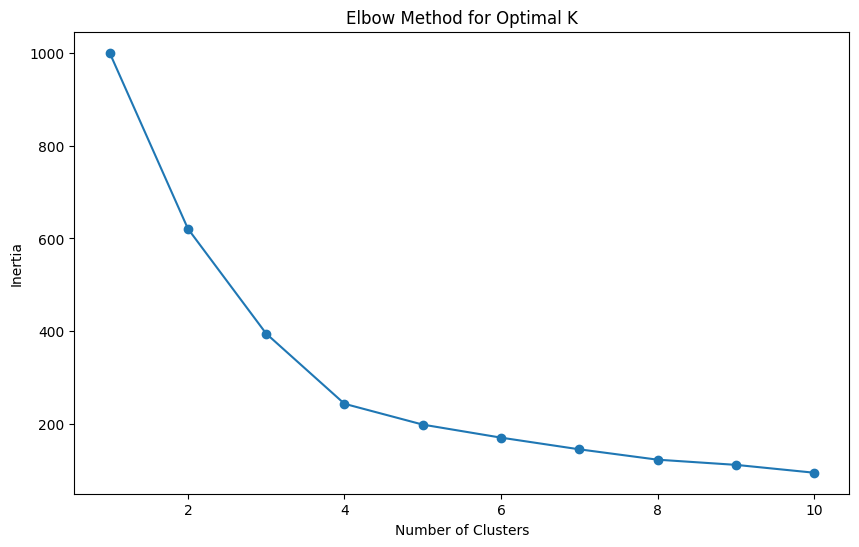

In [ ]:
# Step 19 = Ploting the "Elbow Method for Optimal K"
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

In [ ]:
# Step 20 = Applies K-Means clustering with k=3
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

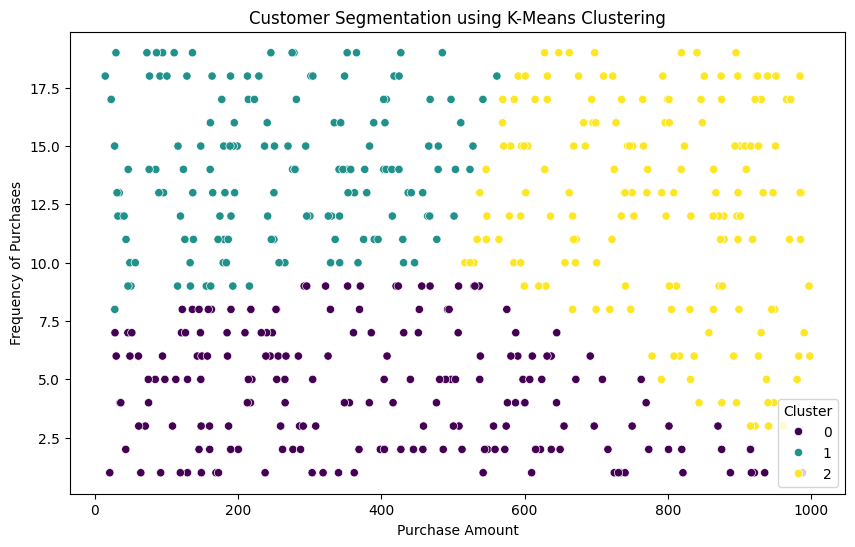

In [ ]:
# Step 21 = Plot the "Customer Segmentation" using K-Means Clustering
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Purchase Amount', y='Frequency of Purchases', hue='Cluster', data=df, palette='viridis')
plt.title('Customer Segmentation using K-Means Clustering')
plt.show()

In [ ]:
# Step 22 = Splits the dataset into features and target for a predictive model.
X = df[['Age', 'Frequency of Purchases']]
y = df['Purchase Amount']

In [ ]:
# Step 23 = Splits the Training data & Testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Step 24 = Making a Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Step 25 = Predict the model
y_pred = model.predict(X_test)

In [ ]:
# Step 26 = Evaluates the performance of a regression model using two key metrics: R-squared (R²) and Root Mean Squared Error (RMSE).
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"R-squared: {r2}, RMSE: {rmse}")

R-squared: -0.05353585353211354, RMSE: 285.9393532750633
